# importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

# exploratory data analysis

In [3]:
df_csv=pd.read_csv('Mall_Customers.csv')
df_csv

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df_csv.shape

(200, 5)

In [6]:
df_csv.index

RangeIndex(start=0, stop=200, step=1)

In [7]:
#check null
df_csv.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df_csv.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df_temp=df_csv.loc[:,['Spending Score (1-100)']]

In [10]:
df_temp.min()

Spending Score (1-100)    1
dtype: int64

In [11]:
df_temp.max()

Spending Score (1-100)    99
dtype: int64

In [12]:
df_temp_annual_income=df_csv.loc[:,['Annual Income (k$)']]

In [13]:
df_temp_annual_income.mean()

Annual Income (k$)    60.56
dtype: float64

# Data visualization

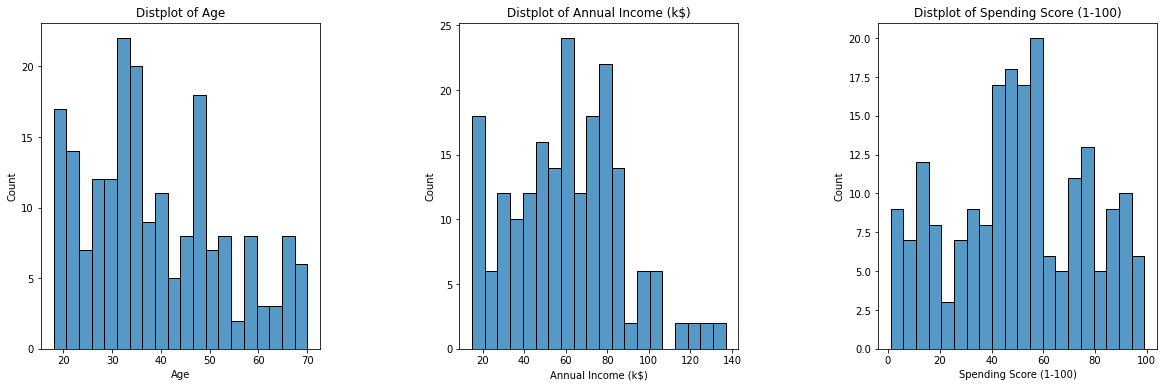

In [14]:
plt.figure(figsize = (20 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(df_csv[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show();

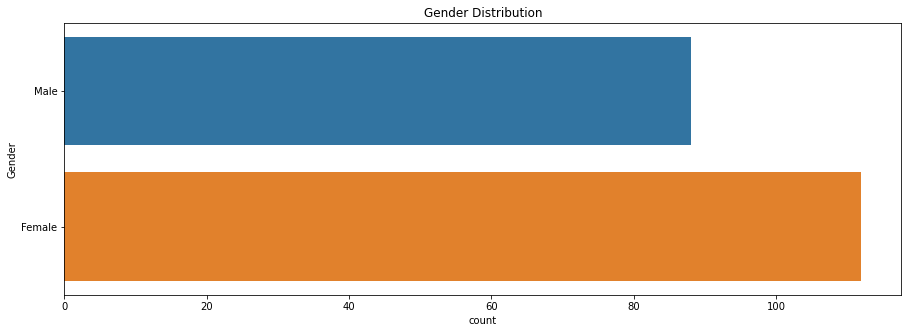

In [15]:
plt.figure(figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df_csv)
plt.title('Gender Distribution')
plt.show();

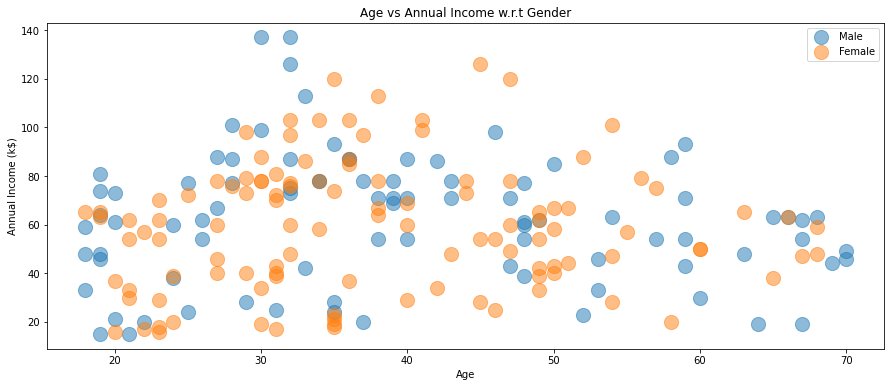

In [16]:
# find relation between age , annual income and gender
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df_csv[df_csv['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

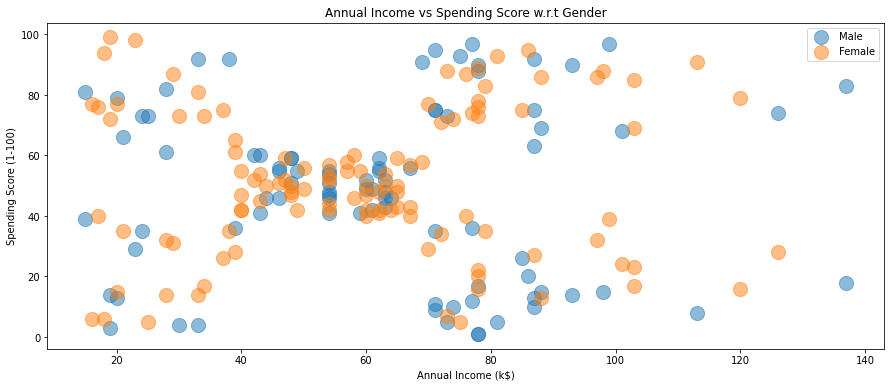

In [17]:
# find relation between spending score , annual income and gender
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df_csv[df_csv['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

# k-means clustering model

In [ ]:
# choosing features to apply k-means model on it 
# i will do it based on annual income and spending score

In [18]:
Data=df_csv.iloc[:,[3,4]].values
print(Data)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [19]:
# to choose optimal number of cluster there are many ways like Elbow Method,Silhouette Coefficient,Gap Statistic,etc
# i will use elbow method  >> WCSS

In [20]:
wcss=[]

for x in range(1,15,1):
    kmeans=KMeans(n_clusters=x,init='k-means++',random_state=42)
    kmeans.fit(Data)
    wcss.append(kmeans.inertia_)

D:\anacondaapp\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


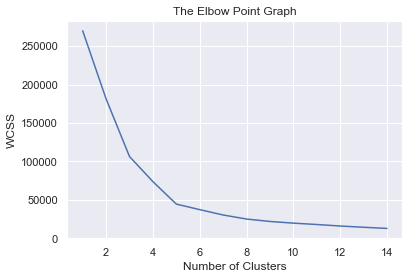

In [21]:
# visualize albow graph
sns.set()
plt.plot(range(1,15,1),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# we found that cutting edge appear at cluster 5 and after it there no  significant change

In [22]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y=kmeans.fit_predict(Data)
print(y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [23]:
cluster_counts = pd.Series(y).value_counts()
print(cluster_counts)

0    81
4    39
1    35
2    23
3    22
dtype: int64


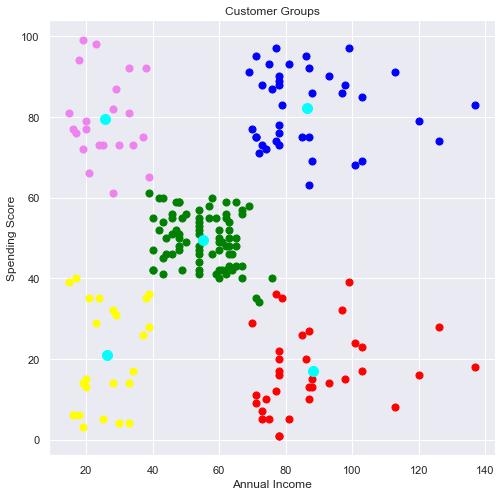

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(Data[y==0,0], Data[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(Data[y==1,0], Data[y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(Data[y==2,0], Data[y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(Data[y==3,0], Data[y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(Data[y==4,0], Data[y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
# based on model we can divide customers into 5 clusters 
#that i will order them based on their size from( biggest to smallest) to 
#1-medium annual income with medium spending score >> count 81 customers
#2- high annual income with high spending score >> count 39 customers
#3-high annual income with low spending score >> count 35 customers
#4-low annual income with low spending score >> count 23 customers
#5-low annual income with high spending score >> count 22 customers

In [ ]:
# so we can  put our foucs and marketing campaign based on this analysis

# make another k-means model using ( age,spending_score)

In [25]:
data_age=df_csv.iloc[:,[2,4]].values
print(data_age)

[[19 39]
 [21 81]
 [20  6]
 [23 77]
 [31 40]
 [22 76]
 [35  6]
 [23 94]
 [64  3]
 [30 72]
 [67 14]
 [35 99]
 [58 15]
 [24 77]
 [37 13]
 [22 79]
 [35 35]
 [20 66]
 [52 29]
 [35 98]
 [35 35]
 [25 73]
 [46  5]
 [31 73]
 [54 14]
 [29 82]
 [45 32]
 [35 61]
 [40 31]
 [23 87]
 [60  4]
 [21 73]
 [53  4]
 [18 92]
 [49 14]
 [21 81]
 [42 17]
 [30 73]
 [36 26]
 [20 75]
 [65 35]
 [24 92]
 [48 36]
 [31 61]
 [49 28]
 [24 65]
 [50 55]
 [27 47]
 [29 42]
 [31 42]
 [49 52]
 [33 60]
 [31 54]
 [59 60]
 [50 45]
 [47 41]
 [51 50]
 [69 46]
 [27 51]
 [53 46]
 [70 56]
 [19 55]
 [67 52]
 [54 59]
 [63 51]
 [18 59]
 [43 50]
 [68 48]
 [19 59]
 [32 47]
 [70 55]
 [47 42]
 [60 49]
 [60 56]
 [59 47]
 [26 54]
 [45 53]
 [40 48]
 [23 52]
 [49 42]
 [57 51]
 [38 55]
 [67 41]
 [46 44]
 [21 57]
 [48 46]
 [55 58]
 [22 55]
 [34 60]
 [50 46]
 [68 55]
 [18 41]
 [48 49]
 [40 40]
 [32 42]
 [24 52]
 [47 47]
 [27 50]
 [48 42]
 [20 49]
 [23 41]
 [49 48]
 [67 59]
 [26 55]
 [49 56]
 [21 42]
 [66 50]
 [54 46]
 [68 43]
 [66 48]
 [65 52]
 

In [26]:
wcss=[]

for x in range(1,15,1):
    kmeans=KMeans(n_clusters=x,init='k-means++',random_state=42)
    kmeans.fit(data_age)
    wcss.append(kmeans.inertia_)

D:\anacondaapp\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


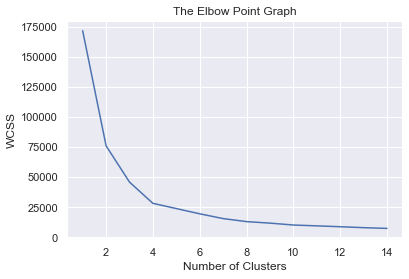

In [27]:
# visualize albow graph
sns.set()
plt.plot(range(1,15,1),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
kmeans_age=KMeans(n_clusters=4,init='k-means++',random_state=42)
y=kmeans_age.fit_predict(data_age)
print(y)

[3 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 3 3 1 2 3 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1
 2 1 2 0 2 0 3 1 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 2 3 2 0 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [29]:
cluster_counts = pd.Series(y).value_counts()
print(cluster_counts)

2    57
1    48
0    48
3    47
dtype: int64


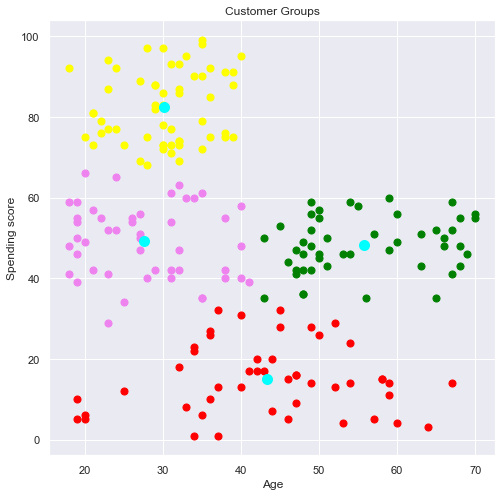

In [30]:
plt.figure(figsize=(8,8))
plt.scatter(data_age[y==0,0], data_age[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(data_age[y==1,0], data_age[y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(data_age[y==2,0], data_age[y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(data_age[y==3,0], data_age[y==3,1], s=50, c='violet', label='Cluster 4')

# plot the centroids
plt.scatter(kmeans_age.cluster_centers_[:,0], kmeans_age.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.show()

In [31]:
# based on model we found that based on age we can consider 4 group 
# i will order them based on size from biggest to smallest 
#1-   spending high score,age (20-40)  >> count 57 customers
#2-  spending medium score ,age (50-70), >> count 48 customers
#3- spending low score ,age (20-70), >> count 48 customers
#4- spending medium score ,age (20-40), >> count 47 customers


In [ ]:
# so we can  put our foucs and marketing campaign based on this analysis